<a href="https://www.kaggle.com/code/efrantemmanuel/eda-parfume-efrant-71230973?scriptVersionId=262571356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Dataset ini adalah kumpulan terstruktur tentang parfum dari berbagai merek. Setiap baris merepresentasikan satu entri parfum tertentu, dengan atribut yang menggambarkan karakteristik, penggunaan, dan performanya. Dataset ini dirancang agar dapat diperluas, sehingga lebih banyak merek dan parfum bisa terus ditambahkan.

Kolom yang ada saat ini:

brand – Perusahaan atau label yang memproduksi parfum (misalnya: Dumont).

perfume – Nama parfum (misalnya: Nitro Red).

type – Konsentrasi atau formulasi parfum (misalnya: EDP – Eau de Parfum).

category – Klasifikasi parfum berdasarkan keluarga aroma atau gaya (misalnya: Fresh Scent, Woody Spicy, Oriental Vanilla).

target_audience – Target pemakai parfum (misalnya: Pria, Wanita, Unisex).

longevity – Performa ketahanan parfum di kulit (misalnya: Strong, Medium).

berikut link data set :
https://r.search.yahoo.com/_ylt=Awrx_LoGzMtoHwIAUJzLQwx.;_ylu=Y29sbwNzZzMEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1759396103/RO=10/RU=https%3a%2f%2fwww.kaggle.com%2fdatasets%2fayushghawana%2fperfume-dataset/RK=2/RS=IbDiSmuesxlp9Nw9epYZGPytafg-

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Datasets

In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/parfume-dataset/Perfumes_dataset.csv


Load Datasets

In [3]:
df = pd.read_csv("/kaggle/input/parfume-dataset/Perfumes_dataset.csv")

Pandas Dataframe Overview

In [4]:
print("Preview DataFrame:")
print(df.head())

Preview DataFrame:
    brand           perfume type     category target_audience longevity
0  dumont         nitro red  edp  Fresh Scent            Male    Strong
1  dumont  nitro pour homme  edp  Fresh Scent            Male    Strong
2  dumont       nitro white  edp  Fresh Scent          Unisex    Strong
3  dumont        nitro blue  edp  Fresh Scent          Unisex    Strong
4  dumont       nitro green  edp  Fresh Scent          Unisex    Strong


Index & Coloumn

In [5]:
print("\nIndex info:", df.index)
print("Column names:", df.columns.tolist())


Index info: RangeIndex(start=0, stop=1004, step=1)
Column names: ['brand', 'perfume', 'type', 'category', 'target_audience', 'longevity']


Schema Dataframe

In [6]:
print("\nDataFrame Schema (info):")
print(df.info())



DataFrame Schema (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            1004 non-null   object
 1   perfume          1004 non-null   object
 2   type             1004 non-null   object
 3   category         1004 non-null   object
 4   target_audience  1004 non-null   object
 5   longevity        1004 non-null   object
dtypes: object(6)
memory usage: 47.2+ KB
None


Statistik Deskriptif

In [7]:
print("\nStatistik Deskriptif:")
print(df.describe(include="all"))

print("\nMean untuk kolom numerik (jika ada):")
print(df.mean(numeric_only=True))

print("\nJumlah data tiap kolom:")
print(df.count())


Statistik Deskriptif:
                     brand                     perfume  type     category  \
count                 1004                        1004  1004         1004   
unique                  55                         940    14          157   
top     Jean Paul Gaultier  Le Classique Eau de Parfum   EDP  Woody Spicy   
freq                    94                          21   500          138   

       target_audience longevity  
count             1004      1004  
unique               7        13  
top             Unisex    Medium  
freq               375       560  

Mean untuk kolom numerik (jika ada):
Series([], dtype: float64)

Jumlah data tiap kolom:
brand              1004
perfume            1004
type               1004
category           1004
target_audience    1004
longevity          1004
dtype: int64


Plot Statistik Atribut

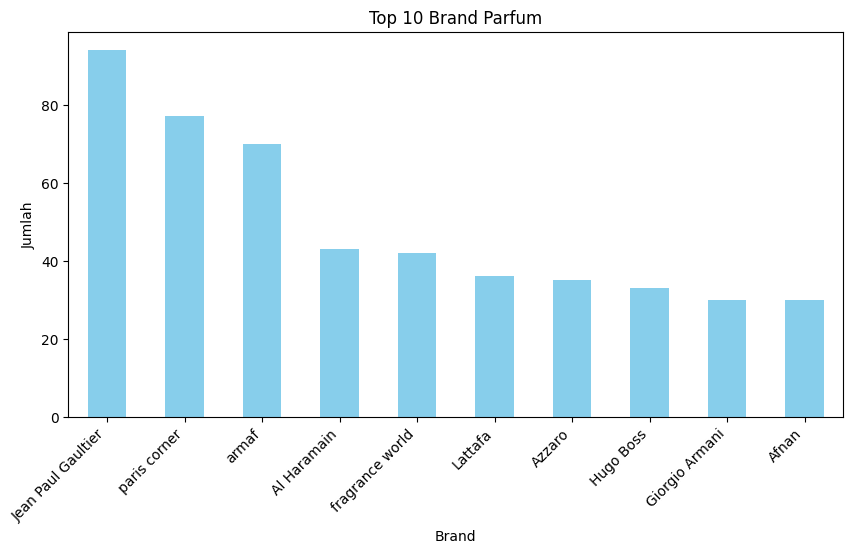

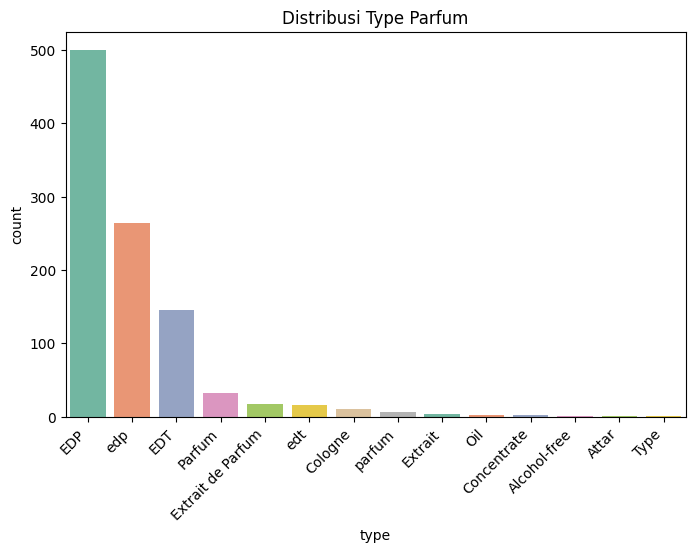

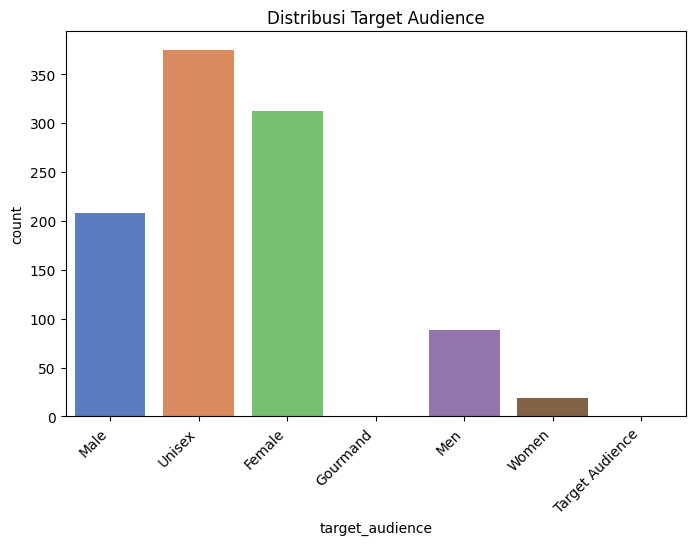

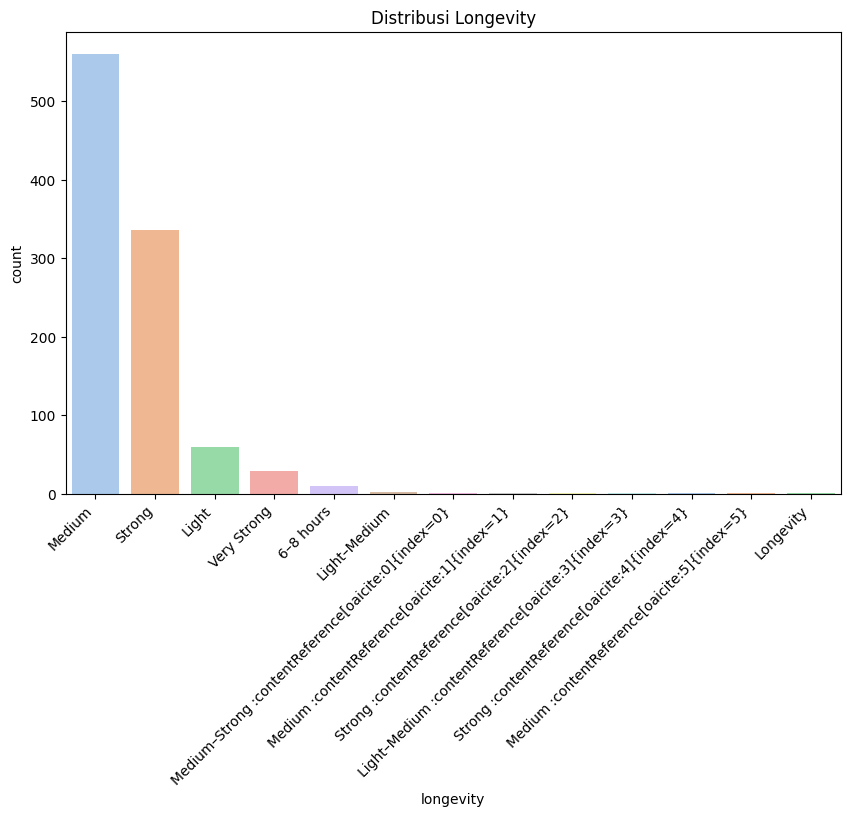

In [8]:
plt.figure(figsize=(10,5))
df['brand'].value_counts().head(10).plot(kind='bar', color="skyblue")
plt.title("Top 10 Brand Parfum")
plt.xlabel("Brand")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")   
plt.show()

plt.figure(figsize=(8,5))  
sns.countplot(x="type", data=df, order=df['type'].value_counts().index, palette="Set2")
plt.title("Distribusi Type Parfum")
plt.xticks(rotation=45, ha="right")   
plt.show()

plt.figure(figsize=(8,5))  
sns.countplot(x="target_audience", data=df, palette="muted")
plt.title("Distribusi Target Audience")
plt.xticks(rotation=45, ha="right")   
plt.show()

plt.figure(figsize=(10,6))  
sns.countplot(x="longevity", data=df, order=df['longevity'].value_counts().index, palette="pastel")
plt.title("Distribusi Longevity")
plt.xticks(rotation=45, ha="right")  
plt.show()


Histogram

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


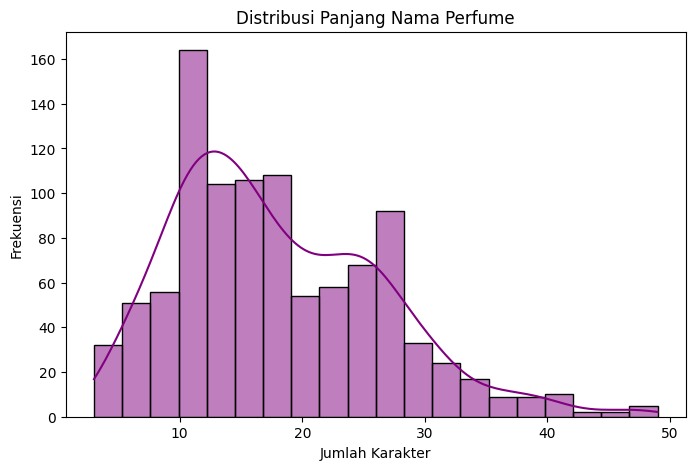

In [9]:
df['perfume_length'] = df['perfume'].astype(str).apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['perfume_length'], bins=20, kde=True, color="purple")
plt.title("Distribusi Panjang Nama Perfume")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.show()

Multivariate Statistics

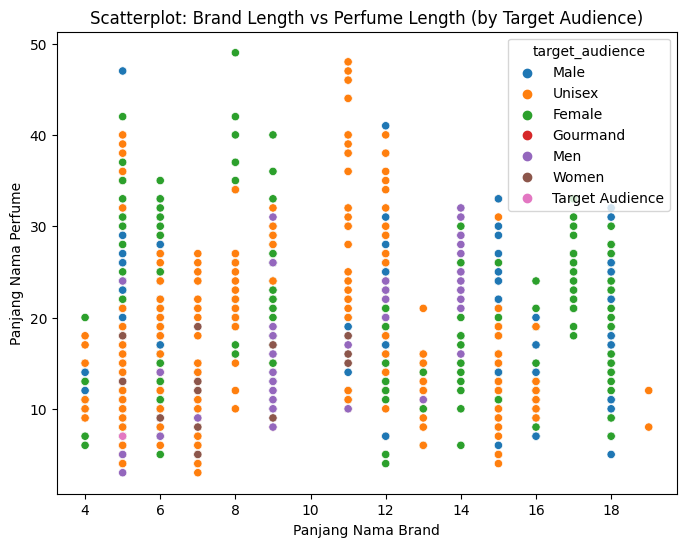

In [10]:
df['brand_length'] = df['brand'].astype(str).apply(len)

plt.figure(figsize=(8,6))
sns.scatterplot(x="brand_length", y="perfume_length", hue="target_audience", data=df)
plt.title("Scatterplot: Brand Length vs Perfume Length (by Target Audience)")
plt.xlabel("Panjang Nama Brand")
plt.ylabel("Panjang Nama Perfume")
plt.show()

Correlation Matrix

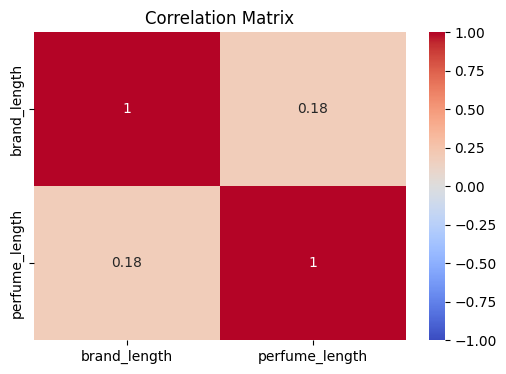

In [11]:
corr = df[['brand_length','perfume_length']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()